<a href="https://colab.research.google.com/github/imranmohd98611-ctrl/Random-Forest/blob/main/loan_prediction_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-casestudy-dataset/loan_prediction.csv


In [ ]:
loan=pd.read_csv("/kaggle/input/loan-prediction-casestudy-dataset/loan_prediction.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_encoded = pd.get_dummies(loan)
loan_encoded.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1


In [ ]:
# Separate the numerical features

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
# Scale the numerical features

scaler = StandardScaler()
loan[numerical_features] = scaler.fit_transform(loan[numerical_features])
loan[numerical_features]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,NaN,0.276642,0.432861
1,-0.134412,-0.038732,-0.215309,0.276642,0.432861
2,-0.393747,-0.554487,-0.940328,0.276642,0.432861
3,-0.462062,0.251980,-0.308860,0.276642,0.432861
4,0.097728,-0.554487,-0.063289,0.276642,0.432861
...,...,...,...,...,...
609,-0.410130,-0.554487,-0.881859,0.276642,0.432861
610,-0.212557,-0.554487,-1.244368,-2.489775,0.432861
611,0.437174,-0.472404,1.246423,0.276642,0.432861
612,0.357064,-0.554487,0.474628,0.276642,0.432861


In [ ]:
# Display summary statistics
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,5.920000e+02,6.000000e+02,5.640000e+02
mean,-4.339634e-18,4.050325e-17,-3.000603e-18,5.329071e-17,-5.039310e-17
std,1.000815e+00,1.000815e+00,1.000846e+00,1.000834e+00,1.000888e+00
min,-8.606493e-01,-5.544873e-01,-1.606878e+00,-5.071764e+00,-2.310212e+00
25%,-4.138159e-01,-5.544873e-01,-5.427370e-01,2.766417e-01,4.328607e-01
50%,-2.606393e-01,-1.480047e-01,-2.153091e-01,2.766417e-01,4.328607e-01
75%,6.414426e-02,2.312023e-01,2.524450e-01,2.766417e-01,4.328607e-01
max,1.238462e+01,1.369617e+01,6.473575e+00,2.120919e+00,4.328607e-01


<Axes: xlabel='Loan_Status', ylabel='count'>

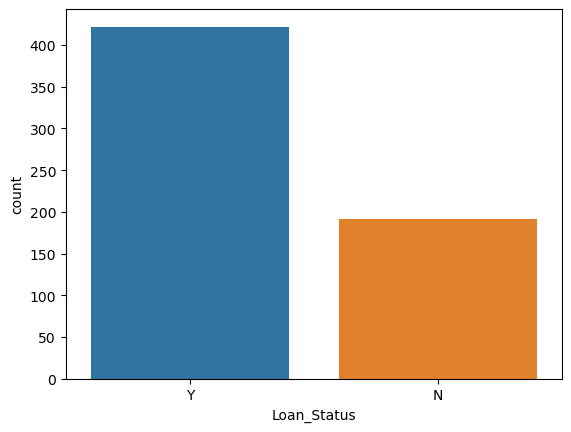

In [ ]:
# Visualize the target variable
sns.countplot(x='Loan_Status', data=loan)

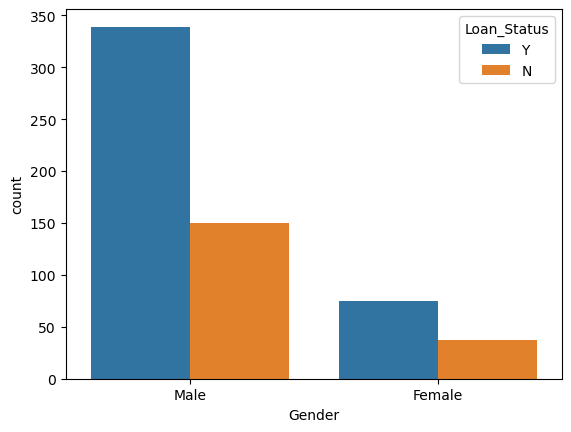

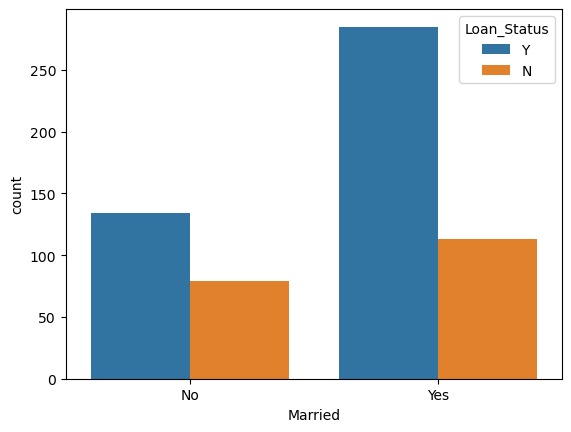

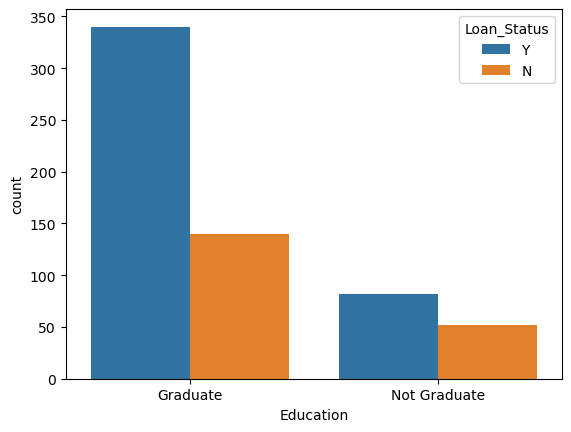

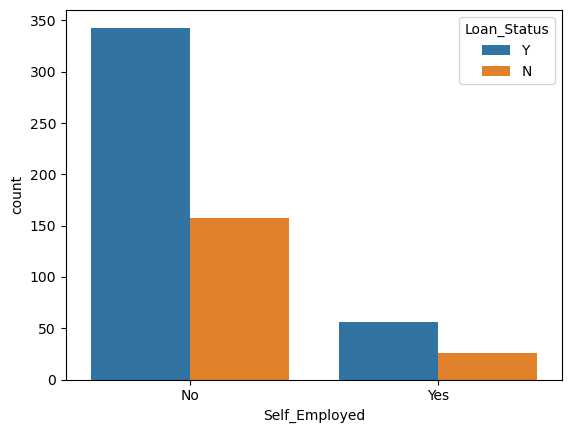

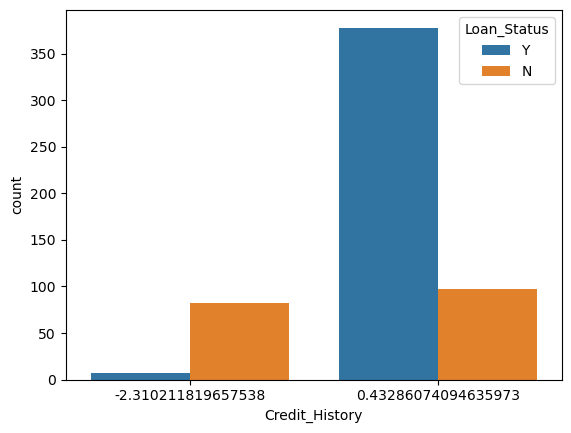

In [ ]:
# Explore the relationship between categorical features and loan approval
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Loan_Status', data=loan)
    plt.show()

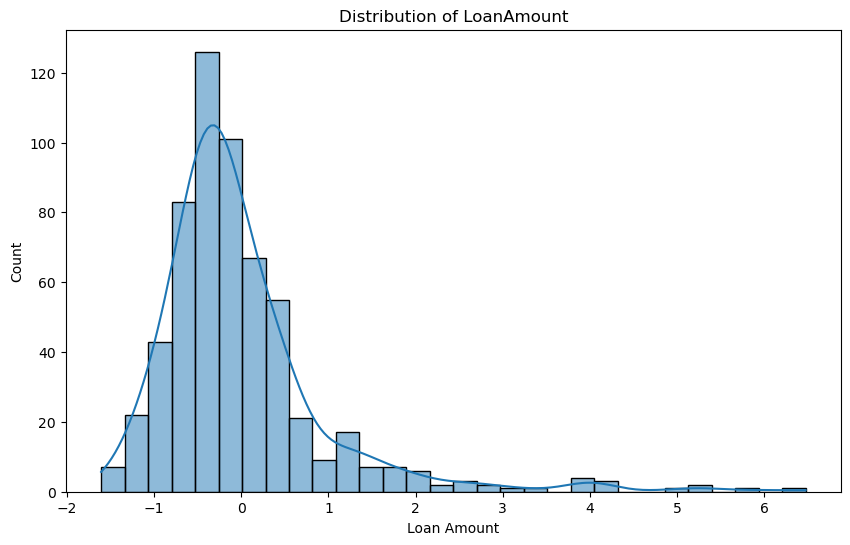

In [ ]:

# Visualize the distribution of LoanAmount
plt.figure(figsize=(10, 6))
sns.histplot(data=loan, x='LoanAmount', bins=30, kde=True)
plt.title('Distribution of LoanAmount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()



In [1]:
# Visualize the relationship between LoanAmount and Loan_Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan, x='Loan_Status', y='LoanAmount')
plt.title('LoanAmount vs Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

NameError: name 'plt' is not defined

/tmp/ipykernel_20/2419697578.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan.corr(), annot=True, cmap='coolwarm')


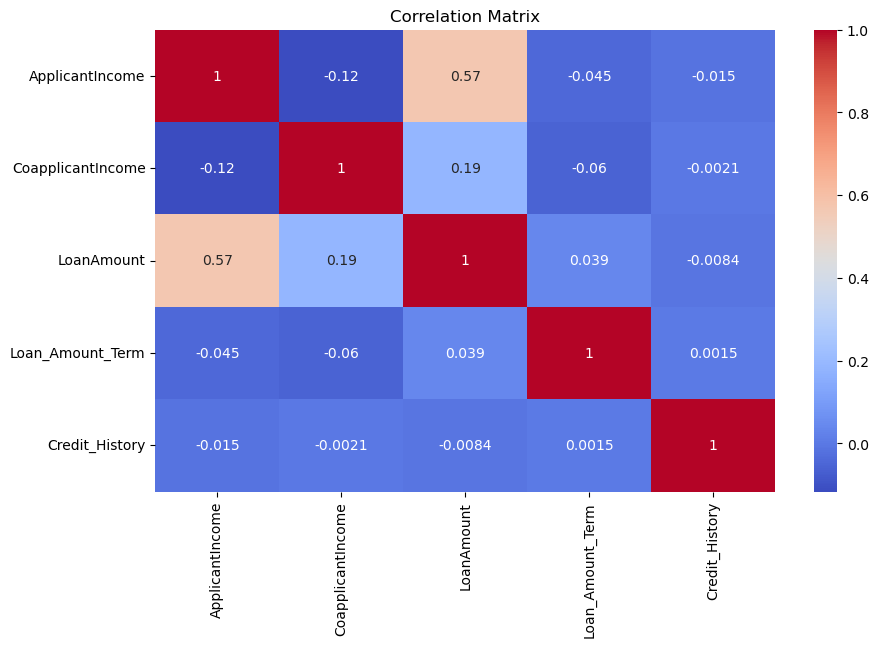

In [ ]:
# Visualize the correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(loan.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



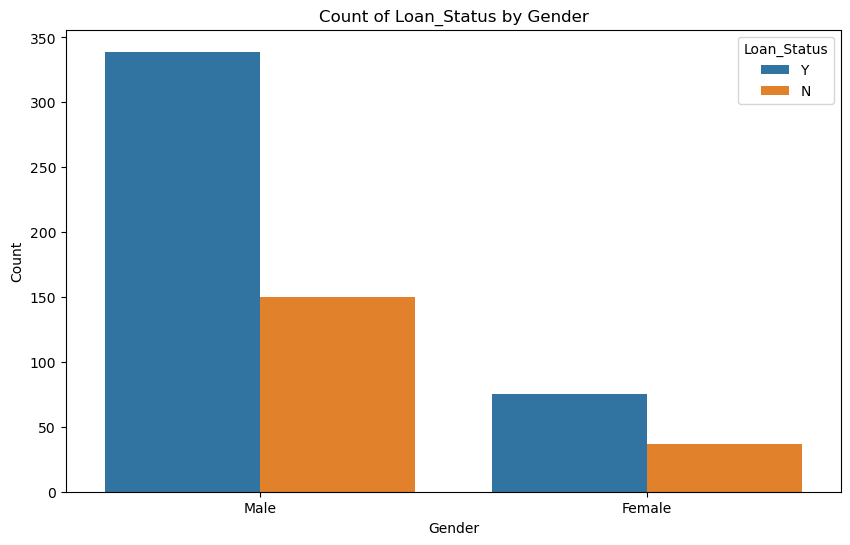

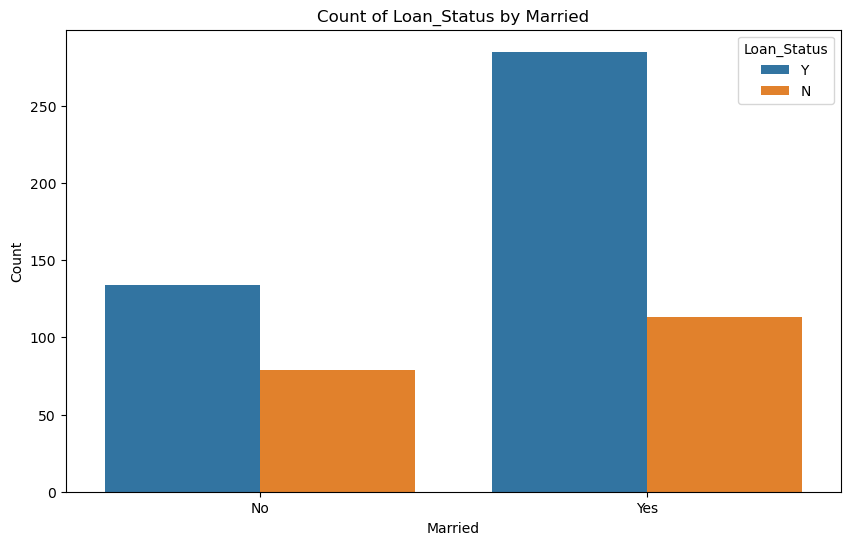

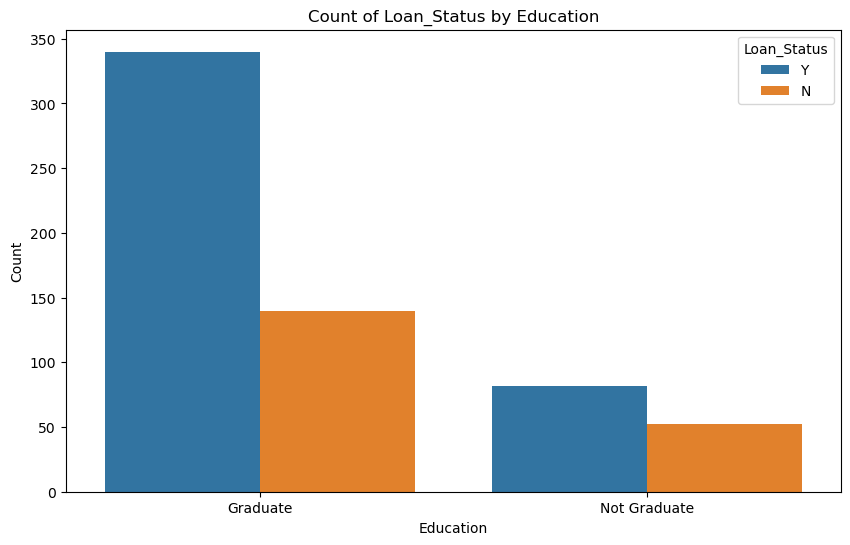

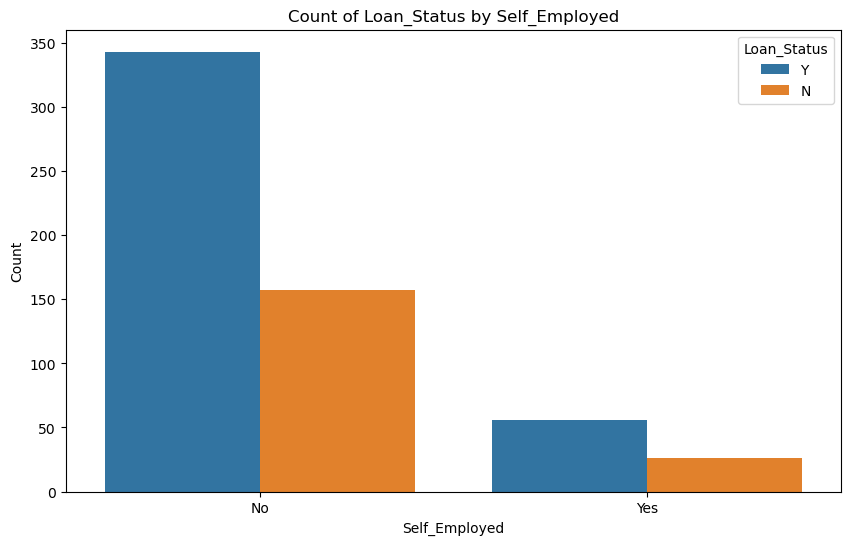

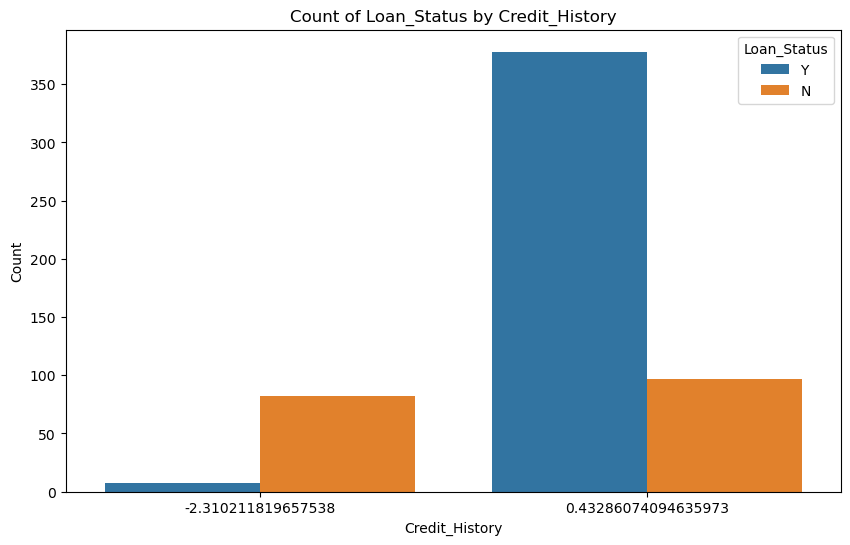

In [ ]:
# Visualize the count of Loan_Status by categorical variables
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=loan, x=feature, hue='Loan_Status')
    plt.title(f'Count of Loan_Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status')
    plt.show()

In [ ]:
# Assuming 'target_variable' is the column name for the target variable
target_variable = 'target_variable'  # Replace with the actual column name
target_variable

'target_variable'

In [ ]:
# Assuming 'numerical_features' is a list of numerical feature column names
numerical_features = ['feature1', 'feature2', 'feature3']  # Replace with actual feature column names
numerical_features

['feature1', 'feature2', 'feature3']

# Handling Outliers:

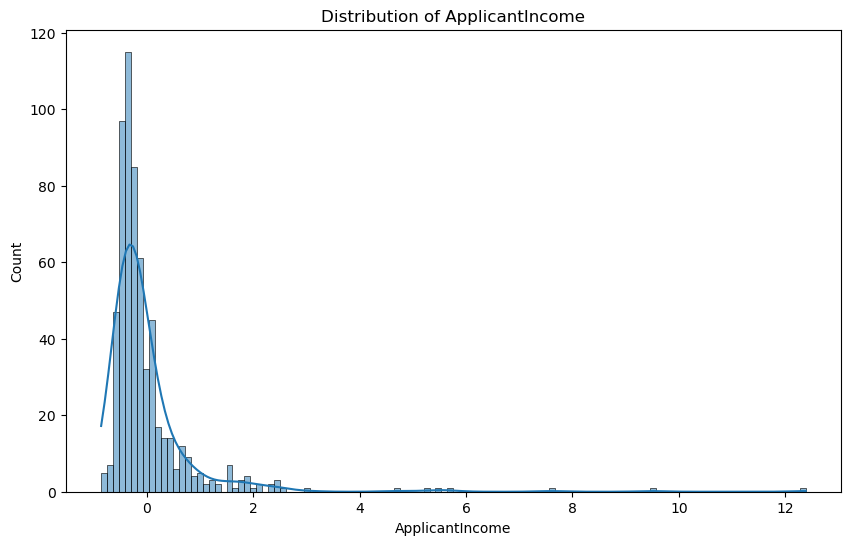

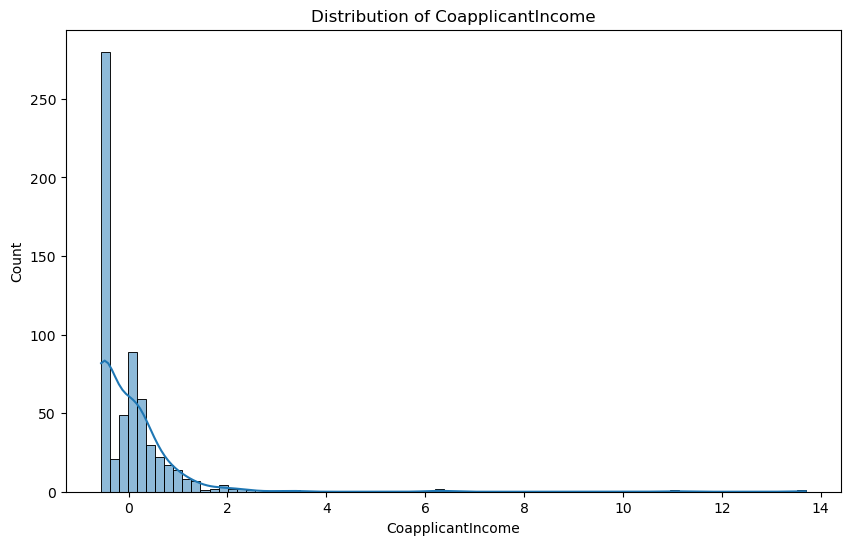

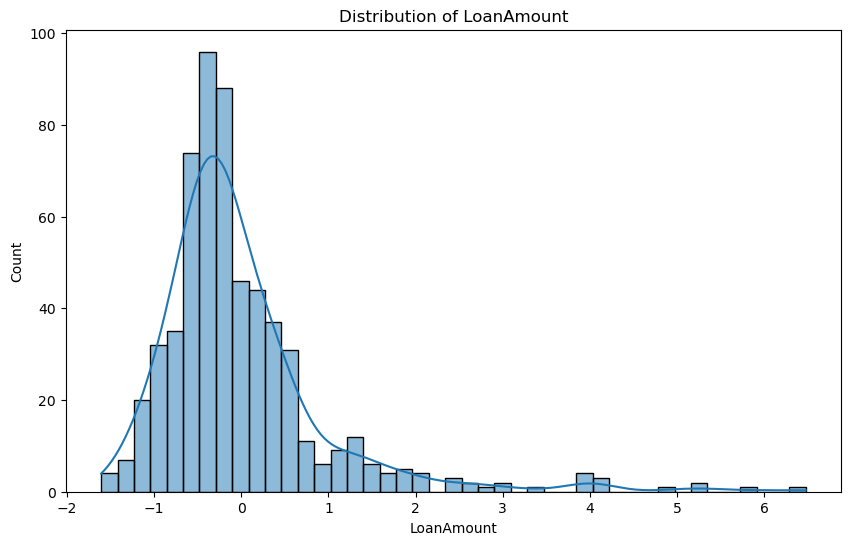

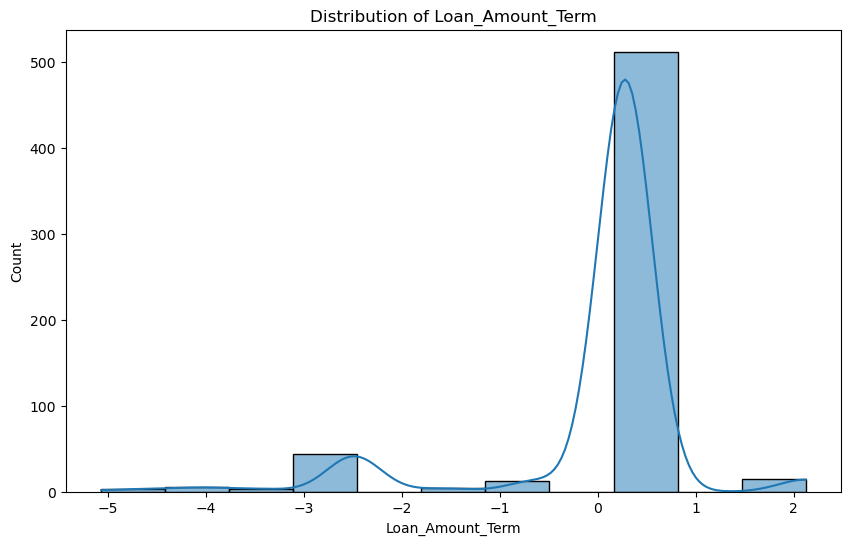

In [ ]:
# Analyze the distribution and handle outliers in numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
        # Plot the distribution of the feature
    sns.histplot(data=loan, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [ ]:
# Calculate the interquartile range (IQR)
Q1 = loan[feature].quantile(0.25)
Q3 = loan[feature].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


0.0


In [ ]:
# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)


0.2766416675862441
0.2766416675862441


In [ ]:
# Identify and handle outliers
loan = loan[(loan[feature] >= lower_bound) & (loan[feature] <= upper_bound)]
loan


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,NaN,0.276642,0.432861,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.215309,0.276642,0.432861,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.940328,0.276642,0.432861,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.308860,0.276642,0.432861,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.554487,-0.063289,0.276642,0.432861,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,-0.355740,0.112438,-0.449186,0.276642,0.432861,Rural,Y
609,LP002978,Female,No,0,Graduate,No,-0.410130,-0.554487,-0.881859,0.276642,0.432861,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.437174,-0.472404,1.246423,0.276642,0.432861,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.357064,-0.554487,0.474628,0.276642,0.432861,Urban,Y


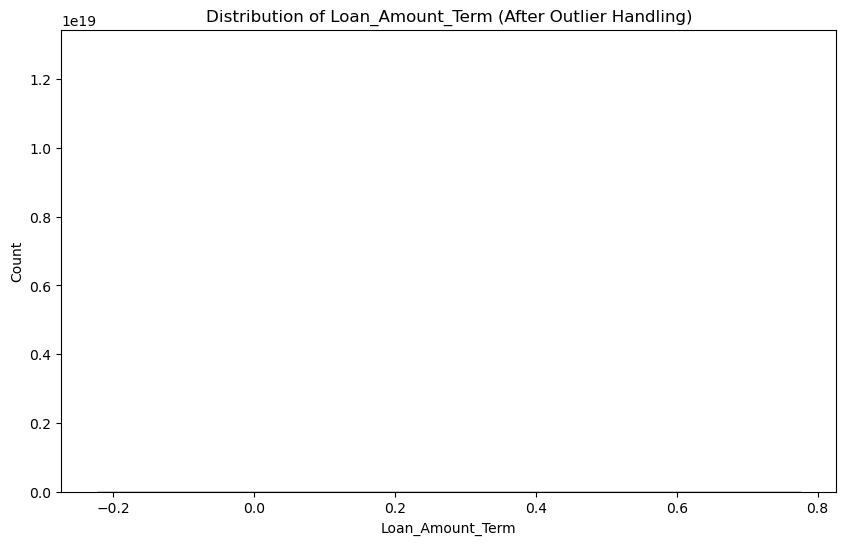

In [ ]:
# Replot the distribution after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(data=loan, x=feature, kde=True)
plt.title(f'Distribution of {feature} (After Outlier Handling)')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

# Dealing with Imbalanced Classes:

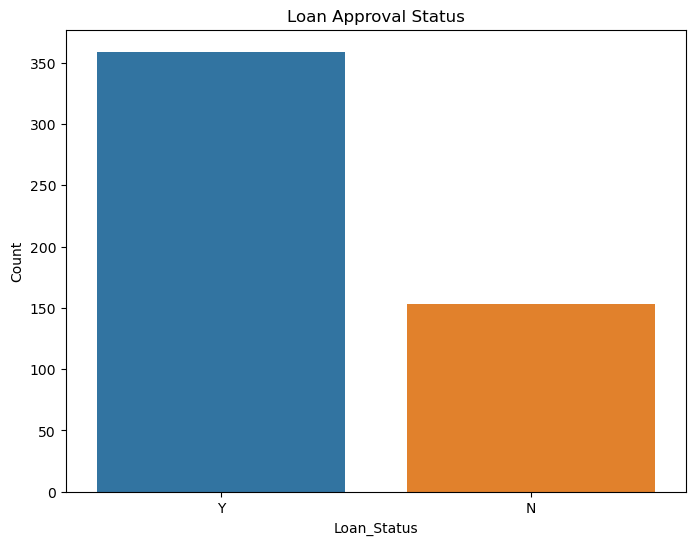

In [ ]:
# Analyze the distribution of Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(data=loan, x='Loan_Status')
plt.title('Loan Approval Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check the class imbalance in Loan_Status
approval_counts = loan['Loan_Status'].value_counts()
print(approval_counts)

Y    359
N    153
Name: Loan_Status, dtype: int64


In [ ]:
# Handle class imbalance using oversampling or undersampling techniques
# Example using Random Oversampling

# Separate the majority and minority classes
majority_class = loan[loan['Loan_Status'] == 'Y']
minority_class = loan[loan['Loan_Status'] == 'N']
print(majority_class)
print(minority_class)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
607  LP002964    Male     Yes          2  Not Graduate            No   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991          -0.554487         NaN          0

In [ ]:
# Oversample the minority class to match the majority class
oversampled_minority = minority_class.sample(n=approval_counts['Y'], replace=True, random_state=42)
print(oversampled_minority)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
414  LP002335  Female     Yes          0  Not Graduate            No   
365  LP002181    Male      No          0  Not Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
431  LP002379    Male      No          0      Graduate            No   
268  LP001883  Female      No          0      Graduate           NaN   
..        ...     ...     ...        ...           ...           ...   
199  LP001673    Male      No          0      Graduate           Yes   
191  LP001656    Male      No          0      Graduate            No   
571  LP002847    Male     Yes        NaN      Graduate            No   
31   LP001095    Male      No          0      Graduate            No   
457  LP002467    Male     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
414        -0.533163           0.552609    0.369384          0

In [ ]:
# Combine the oversampled minority class with the majority class
loan_oversampled = pd.concat([majority_class, oversampled_minority])
loan_oversampled

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,NaN,0.276642,0.432861,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.940328,0.276642,0.432861,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.308860,0.276642,0.432861,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.554487,-0.063289,0.276642,0.432861,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,0.002218,0.880600,1.410137,0.276642,0.432861,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,LP001673,Male,No,0,Graduate,Yes,0.916855,-0.554487,-0.741533,0.276642,0.432861,Urban,N
191,LP001656,Male,No,0,Graduate,No,1.080680,-0.554487,0.205670,0.276642,0.432861,Semiurban,N
571,LP002847,Male,Yes,NaN,Graduate,No,-0.047093,-0.058226,0.217363,0.276642,-2.310212,Urban,N
31,LP001095,Male,No,0,Graduate,No,-0.366389,-0.554487,-0.846777,0.276642,0.432861,Urban,N


In [ ]:
# Check the class distribution after oversampling
oversampled_counts = loan_oversampled['Loan_Status'].value_counts()
print(oversampled_counts)

Y    359
N    359
Name: Loan_Status, dtype: int64


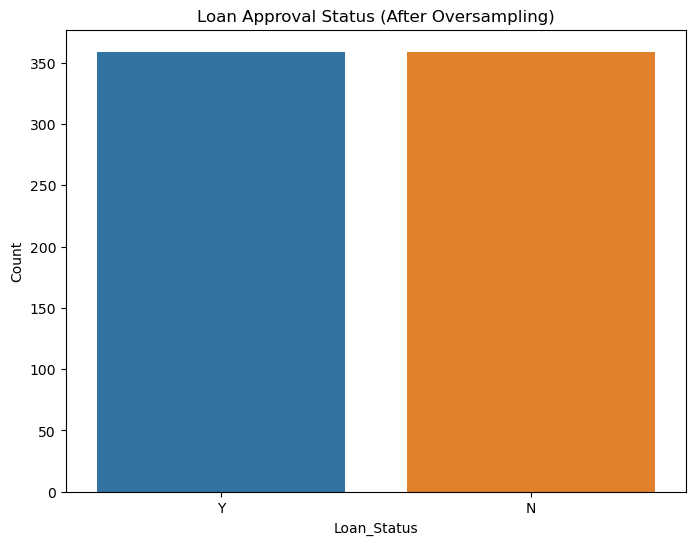

In [ ]:
# Reanalyze the distribution of Loan_Status after handling class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_oversampled, x='Loan_Status')
plt.title('Loan Approval Status (After Oversampling)')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

# Feature Engineering:

In [ ]:
# Create new features
loan['Income_to_Loan_Ratio'] = loan['ApplicantIncome'] / loan['LoanAmount']
print(loan['Income_to_Loan_Ratio'])


0           NaN
1      0.624274
2      0.418734
3      1.496026
4     -1.544161
         ...   
608    0.791965
609    0.465074
611    0.350743
612    0.752302
613    0.857001
Name: Income_to_Loan_Ratio, Length: 512, dtype: float64


/tmp/ipykernel_20/3075349658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['Income_to_Loan_Ratio'] = loan['ApplicantIncome'] / loan['LoanAmount']


In [ ]:
loan['Total_Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
print(loan['Total_Income'])

0     -0.481497
1     -0.173144
2     -0.948235
3     -0.210083
4     -0.456759
         ...   
608   -0.243302
609   -0.964617
611   -0.035230
612   -0.197424
613   -0.688899
Name: Total_Income, Length: 512, dtype: float64


/tmp/ipykernel_20/941115453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['Total_Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']


In [ ]:
# Convert categorical variables into binary indicators using one-hot encoding
loan_encoded = pd.get_dummies(loan, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                                             'Credit_History', 'Property_Area'], drop_first=True)
print(loan_encoded.head())

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002         0.072991          -0.554487         NaN          0.276642   
1  LP001003        -0.134412          -0.038732   -0.215309          0.276642   
2  LP001005        -0.393747          -0.554487   -0.940328          0.276642   
3  LP001006        -0.462062           0.251980   -0.308860          0.276642   
4  LP001008         0.097728          -0.554487   -0.063289          0.276642   

  Loan_Status  Income_to_Loan_Ratio  Total_Income  Gender_Male  Married_Yes  \
0           Y                   NaN     -0.481497            1            0   
1           N              0.624274     -0.173144            1            1   
2           Y              0.418734     -0.948235            1            1   
3           Y              1.496026     -0.210083            1            1   
4           Y             -1.544161     -0.456759            1            0   

   Dependents_1  Dependents_2  Depende

# Model Selection:

In [ ]:
# Define the features and target variable
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'
print(categorical_features)
print(numerical_features)
print(target)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Loan_Status


In [ ]:
# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(loan[categorical_features]).toarray())


In [ ]:
# Define the categorical features
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(loan[categorical_features]).toarray())

# Assign column names to the encoded features
column_names = []
for feature, categories in zip(categorical_features, encoder.categories_):
    column_names.extend([f"{feature}_{category}" for category in categories[1:]])
encoded_features.columns = column_names

# Print the encoded features
print(encoded_features)

     Gender_Male  Gender_nan  Married_Yes  Married_nan  \
0            1.0         0.0          0.0          0.0   
1            1.0         0.0          1.0          0.0   
2            1.0         0.0          1.0          0.0   
3            1.0         0.0          1.0          0.0   
4            1.0         0.0          0.0          0.0   
..           ...         ...          ...          ...   
507          1.0         0.0          1.0          0.0   
508          0.0         0.0          0.0          0.0   
509          1.0         0.0          1.0          0.0   
510          1.0         0.0          1.0          0.0   
511          0.0         0.0          0.0          0.0   

     Education_Not Graduate  Self_Employed_Yes  Self_Employed_nan  \
0                       0.0                0.0                0.0   
1                       0.0                0.0                0.0   
2                       0.0                1.0                0.0   
3                       1.0